### In this lab, we will use Tweepy to obtain tweets about a particular topic.
<b>Step 1: Generate the four Authorized keys</b>
<br>
1. Create a Twitter account to use Twitter API. (If you already have one, skip this step).
2. Go to https://apps.twitter.com/ , go to My apps→ sign in. 
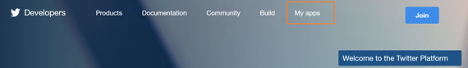

3. Keys generation 
Select create a new app and fill out the form (the asked website in the form you can use “https://www.fordham.edu/”).
<br>
<br>
If you are asked to add your mobile to your profile before creating a new app, you can go to top right corner of the webpage, click your profile image > back to Twitter > click your profile image > Settings > Mobile. After verifying your mobile, you can go back to the page to finish creating the new app.
<br>
<br>
After you created the new app, go to Keys and Access Tokens tab and save the Consumer Key and Consumer Secret. 
<br>
<br>
Select create my access token to create Access Token and Access Token Secret.
<br><br>
Save the 4 keys (Consumer Key, Consumer Secret, Access Token, Access Token Secret) for using in the code later.<br>

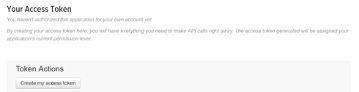

<b>Step 2: Install Tweepy Package</b><br>
Uncomment and run this code below to install Tweepy

In [1]:
!pip3 install tweepy

<b>Step 3: Run the code</b><br>
Run the following code to see if you understand.

In [2]:
# Import packages
import os
import tweepy
import pandas as pd

In [3]:
# TODO: Replace the keys you saved from the Twitter API at the appropriate locations
auth = tweepy.auth.OAuthHandler('API Key'，'API Secret Key')
auth.set_access_token('Access token', 'Access token secret')

SyntaxError: invalid character '，' (U+FF0C) (1413924045.py, line 2)

In [ ]:
# Twitter api rate limit may be reached with an error occuring
# wait_on_rate_limit=True will avoid this situation, and wait for 60 seconds
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# I provide the below 3 parameters for you: 
# search words, whether to include retweets, number of tweets
search_words = "TESLA"
new_search = search_words + " -filter:retweets"
num_of_tweets = 10

# start keyword search 
tweets = tweepy.Cursor(api.search_tweets,
                       q=new_search,
                       lang="en").items(num_of_tweets)

tweets

In [ ]:
type(tweets)

In [ ]:
# Collect a list of tweets
tweet_text = [tweet.text.encode('utf-8') for tweet in tweets]

# view the list of tweets
tweet_text

In [ ]:
# use the predefined 4 parameters above
tweets = tweepy.Cursor(api.search_tweets,
              q=new_search,
              lang="en").items(num_of_tweets)

# create tweets_info as lists of tweets information
tweets_info = [[tweet.id,
               tweet.user.screen_name, 
                tweet.user.followers_count, 
                tweet.user.location, 
                tweet.text.encode('utf-8')] for tweet in tweets]

In [ ]:
# create a dataframe with column names
tweet_df = pd.DataFrame(data=tweets_info, 
                    columns=["Tweet ID","Screen Name", "Number of Followers", "Location", "Tweet"])

# view the tweet info dataframe
tweet_df

In [ ]:
# save the tweet info dataframe to csv
tweet_df.to_csv(search_words+"_tweets.csv")

# Remember to try your own keywords!